In [1]:
import scirpy as ir

/home/kvalem/.conda/envs/tcr_2024/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import scanpy as sc

In [3]:
from glob import glob
import warnings
import tarfile

import anndata
import matplotlib.pyplot as plt
import pandas as pd
import scanpy as sc

In [4]:
import muon as mu

In [5]:
import numpy as np

In [6]:
samples = {
    "10mix1": {"group": "10mix"},
    "10mix2": {"group": "10mix"},
    "11mix1": {"group": "11mix"},
    "11mix2": {"group": "11mix"},
    "GF1": {"group": "GF"},
    "GF2": {"group": "GF"},

}    
    
# Create a list of AnnData objects (one for each sample)
adatas_tcr = {}
adatas_gex = {}
for sample, sample_meta in samples.items():
    #adata_gex = sc.read_10x_h5(f"/data/projects/2021/MicrobialMetabolites/single-cell-sorted-cd8/2019-10-29_sorted_cd8/analyses_icbi/{sample}/outs/per_sample_outs/{sample}/count/sample_filtered_feature_bc_matrix.h5")
    adata_tcr = ir.io.read_10x_vdj(f"/data/projects/2021/MicrobialMetabolites/single-cell-sorted-cd8/2019-10-29_sorted_cd8/analyses_icbi/{sample}/outs/per_sample_outs/{sample}/vdj_t/filtered_contig_annotations.csv")
    # concatenation only works with unique gene names
    #adata_gex.var_names_make_unique()
    adatas_tcr[sample] = adata_tcr
    #adatas_gex[sample] = adata_gex

/home/kvalem/.conda/envs/tcr_2024/lib/python3.12/site-packages/anndata/utils.py:334: ExperimentalFeatureWarning: Support for Awkward Arrays is currently experimental. Behavior may change in the future. Please report any issues you may encounter!
  warnings.warn(msg, category, stacklevel=stacklevel)


In [7]:
samples = {
    "10mix-ICI1": {"group": "10mix", "condition":"ICI"},
    "10mix-ICI2": {"group": "10mix","condition":"ICI"},
    "11mix-ICI1": {"group": "11mix","condition":"ICI"},
    "11mix-ICI2": {"group": "11mix","condition":"ICI"},
    "GF-ICI1": {"group": "GF","condition":"No ICI"},
    "GF-ICI2": {"group": "GF","condition":"No ICI"},
    "GF-ICI1-plus": {"group": "GF-plus","condition":"ICI"},
    "GF-ICI2-plus": {"group": "GF-plus","condition":"ICI"},


}    
    
# Create a list of AnnData objects (one for each sample)
adatas_tcr_2021 = {}
#adatas_gex_2021 = {}
for sample, sample_meta in samples.items():
    #adata_gex_2021 = sc.read_10x_h5(f"/data/projects/2021/MicrobialMetabolites/single-cell-sorted-cd8/2021-02-01_sorted_cd8_til/analyses_icbi/{sample}/outs/per_sample_outs/{sample}/count/sample_filtered_feature_bc_matrix.h5")
    adata_tcr_2021 = ir.io.read_10x_vdj(f"/data/projects/2021/MicrobialMetabolites/single-cell-sorted-cd8/2021-02-01_sorted_cd8_til/analyses_icbi/{sample}/outs/per_sample_outs/{sample}/vdj_t/filtered_contig_annotations.csv")
    # concatenation only works with unique gene names
    #adata_gex_2021.var_names_make_unique()
    adatas_tcr_2021[sample] = adata_tcr_2021
    #adatas_gex_2021[sample] = adata_gex_2021

In [8]:
samples = {
    "10mix-ICI1": {"group": "10mix", "condition":"ICI"},
    "10mix-ICI2": {"group": "10mix","condition":"ICI"},
    "11mix-ICI1": {"group": "11mix","condition":"ICI"},
    "11mix-ICI2": {"group": "11mix","condition":"ICI"},
    "GF-ICI1": {"group": "GF","condition":"No ICI"},
    "GF-ICI2": {"group": "GF","condition":"No ICI"},
    "GF-ICI1-plus": {"group": "GF-plus","condition":"ICI"},
    "GF-ICI2-plus": {"group": "GF-plus","condition":"ICI"},
    "10mix1": {"group": "10mix", "condition":"naive"},
    "10mix2": {"group": "10mix", "condition":"naive"},
    "11mix1": {"group": "11mix", "condition":"naive"},
    "11mix2": {"group": "11mix", "condition":"naive"},
    "GF1": {"group": "GF", "condition":"naive"},
    "GF2": {"group": "GF", "condition":"naive"},
}    

## Load GEX

In [9]:
adata = sc.read_h5ad("adata_solo_annotated_all.h5ad")

In [10]:
adata_colon = adata[adata.obs["origin"]=="colon"]

In [11]:
adata_colon.obs.cell_type.replace("COLON_Infg","COLON_Exhausted", inplace=True)

/tmp/ipykernel_2219903/2241666715.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  adata_colon.obs.cell_type.replace("COLON_Infg","COLON_Exhausted", inplace=True)
/tmp/ipykernel_2219903/2241666715.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  adata_colon.obs.cell_type.replace("COLON_Infg","COLON_Exhausted",

In [12]:
adata_til = adata[adata.obs["origin"]=="til"]

In [13]:
adata_til.obs.cell_type.replace('MPEC_Effector','MPEC_Exhausted', inplace=True)
adata_til.obs.cell_type.replace('MPEC_Progenitor','MPEC_Naive', inplace=True)
adata_til.obs.cell_type.replace('SLEC_Effector','SLEC_Intermediate', inplace=True)
adata_til.obs.cell_type.replace('SLEC_Inf','SLEC_Intermediate', inplace=True)
adata_til.obs.cell_type.replace('SLEC_Plastic','SLEC_Intermediate', inplace=True)
adata_til.obs.cell_type.replace('SLEC_Terminal','SLEC_Exhausted', inplace=True)
adata_til.obs.cell_type.replace('SLEC_Progenitor','SLEC_Naive', inplace=True)

/tmp/ipykernel_2219903/3924628280.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  adata_til.obs.cell_type.replace('MPEC_Effector','MPEC_Exhausted', inplace=True)
/tmp/ipykernel_2219903/3924628280.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  adata_til.obs.cell_type.replace('MPEC_Effector','MPEC_Exhausted',

In [14]:
# Merge anndata objects
adata_tcr = anndata.concat(adatas_tcr, index_unique="_")

In [15]:
# Merge anndata objects
adata_tcr_2021 = anndata.concat(adatas_tcr_2021, index_unique="_")

In [16]:
adata_colon.obs["sample"] = adata_colon.obs_names.to_series().str.split("_", expand=True)[1]

/tmp/ipykernel_2219903/2579415858.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_colon.obs["sample"] = adata_colon.obs_names.to_series().str.split("_", expand=True)[1]


In [17]:
adata_colon.obs["sample"].value_counts()

sample
11mix2    3196
11mix1    2266
10mix1    2206
10mix2    1618
GF1       1520
GF2        343
Name: count, dtype: int64

In [18]:
adata_colon.obs["sample_id"].value_counts()

sample_id
11mix2    3196
11mix1    2266
10mix1    2206
10mix2    1618
GF1       1520
GF2        343
Name: count, dtype: int64

In [19]:
adata_til.obs

,_scvi_batch,_scvi_labels,batch,batch_id,cell_type,condition,is_doublet,is_outlier,is_outlier_counts,is_outlier_genes,...,pct_counts_mt,pct_counts_ribo,sample_id,total_counts,total_counts_mt,total_counts_ribo,value,outlier,mt_outlier,ribo_outlier
AAACCTGAGAGCCTAG-1_10mix_ICI1,0,0,0,ICI1,SLEC_Exhausted,10mix,singlet,False,False,False,...,0.000000,7.306554,10mix_ICI1,8468.025391,0.000000,618.720886,0,False,False,False
AAACCTGAGGCTCTTA-1_10mix_ICI1,0,0,0,ICI1,MPEC_Naive,10mix,singlet,False,False,False,...,0.975798,7.538410,10mix_ICI1,9098.912109,88.787018,685.913269,0,False,False,False
AAACCTGAGGGCTTGA-1_10mix_ICI1,0,0,0,ICI1,MPEC_Intermediate,10mix,singlet,False,False,False,...,0.984529,9.105783,10mix_ICI1,7737.306152,76.176064,704.542297,0,False,False,False
AAACCTGAGGTTACCT-1_10mix_ICI1,0,0,0,ICI1,SLEC_Exhausted,10mix,singlet,False,False,False,...,0.473887,3.969964,10mix_ICI1,16565.292969,78.500778,657.636169,0,False,False,False
AAACCTGCAACCGCCA-1_10mix_ICI1,0,0,0,ICI1,SLEC_Intermediate,10mix,singlet,False,False,False,...,0.000000,8.942920,10mix_ICI1,6814.036621,0.000000,609.373840,0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCCCTTGCA-1_GF_ICI2_plus,0,0,7,ICI2,SLEC_Intermediate,GF-plus,singlet,False,False,False,...,0.997952,7.832887,GF_ICI2_plus,8411.129883,83.939003,658.834290,0,False,False,False
TTTGTCATCGTTGCCT-1_GF_ICI2_plus,0,0,7,ICI2,SLEC_Exhausted,GF-plus,singlet,False,False,False,...,0.508929,3.862386,GF_ICI2_plus,16598.160156,84.472771,641.084961,0,False,False,False
TTTGTCATCTAACTGG-1_GF_ICI2_plus,0,0,7,ICI2,SLEC_Intermediate,GF-plus,singlet,False,False,False,...,0.569025,6.085393,GF_ICI2_plus,6226.758789,35.431831,378.922791,0,False,False,False
TTTGTCATCTCTGTCG-1_GF_ICI2_plus,0,0,7,ICI2,SLEC_Intermediate,GF-plus,singlet,False,False,False,...,0.986108,13.810773,GF_ICI2_plus,4548.755371,44.855644,628.218262,0,False,False,False


In [20]:
adata_til.obs["sample"] = adata_til.obs_names.to_series().str.split("_", expand=True)[1]

/tmp/ipykernel_2219903/2114681352.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_til.obs["sample"] = adata_til.obs_names.to_series().str.split("_", expand=True)[1]


In [21]:
adata_til.obs["sample"].value_counts()

sample
GF       20760
10mix    15286
11mix    13264
Name: count, dtype: int64

In [22]:
adata_tcr.obs

""
cell_id
AAACCTGAGTCTTGCA-1_10mix1
AAACCTGAGTTAAGTG-1_10mix1
AAACCTGCAGGATCGA-1_10mix1
AAACCTGCATACCATG-1_10mix1
AAACCTGCATTGAGCT-1_10mix1
...
TTTGCGCTCGGTGTTA-1_GF2
TTTGTCAAGGCTAGCA-1_GF2
TTTGTCAAGTGCCAGA-1_GF2


In [23]:
adata_tcr.obs["sample_id"] = adata_tcr.obs_names.to_series().str.split("_", expand=True)[1]

In [24]:
adata_tcr.obs["sample_id"].value_counts()

sample_id
11mix2    3730
10mix1    2898
11mix1    2785
GF1       2668
10mix2    2267
GF2        859
Name: count, dtype: int64

In [25]:
adata_tcr.obs["group"] = adata_tcr.obs["sample_id"].map(lambda x: samples[x]["group"])
adata_tcr.obs["condition"] = adata_tcr.obs["sample_id"].map(lambda x: samples[x]["condition"])

In [26]:
adata_tcr.obs["group"].value_counts()

group
11mix    6515
10mix    5165
GF       3527
Name: count, dtype: int64

In [27]:
adata_tcr.obs

,sample_id,group,condition
cell_id,,,
AAACCTGAGTCTTGCA-1_10mix1,10mix1,10mix,naive
AAACCTGAGTTAAGTG-1_10mix1,10mix1,10mix,naive
AAACCTGCAGGATCGA-1_10mix1,10mix1,10mix,naive
AAACCTGCATACCATG-1_10mix1,10mix1,10mix,naive
AAACCTGCATTGAGCT-1_10mix1,10mix1,10mix,naive
...,...,...,...
TTTGCGCTCGGTGTTA-1_GF2,GF2,GF,naive
TTTGTCAAGGCTAGCA-1_GF2,GF2,GF,naive
TTTGTCAAGTGCCAGA-1_GF2,GF2,GF,naive


In [28]:
adata_tcr_2021.obs["sample_id"] = adata_tcr_2021.obs_names.to_series().str.split("_", expand=True)[1]

In [29]:
adata_tcr_2021.obs.sample_id.value_counts()

sample_id
10mix-ICI2      8543
11mix-ICI2      7808
11mix-ICI1      7735
GF-ICI2-plus    7406
10mix-ICI1      7265
GF-ICI1-plus    6247
GF-ICI1         5840
GF-ICI2         5461
Name: count, dtype: int64

In [30]:

adata_tcr_2021.obs_names = adata_tcr_2021.obs_names.str.replace('-', '_')


In [31]:
adata_tcr_2021.obs

,sample_id
cell_id,
AAACCTGAGAGCCTAG_1_10mix_ICI1,10mix-ICI1
AAACCTGAGGCTCTTA_1_10mix_ICI1,10mix-ICI1
AAACCTGAGGGCACTA_1_10mix_ICI1,10mix-ICI1
AAACCTGAGGGCTTGA_1_10mix_ICI1,10mix-ICI1
AAACCTGAGGTTACCT_1_10mix_ICI1,10mix-ICI1
...,...
TTTGTCATCCAGAGGA_1_GF_ICI2_plus,GF-ICI2-plus
TTTGTCATCCCTTGCA_1_GF_ICI2_plus,GF-ICI2-plus
TTTGTCATCTAACTGG_1_GF_ICI2_plus,GF-ICI2-plus


In [32]:
# Set global met'adata on `mdata.obs`
#adata_tcr_2021.obs["sample_id"] = adata_tcr_2021.obs_names.to_series().str.split("_", expand=True)[1]
adata_tcr_2021.obs["group"] = adata_tcr_2021.obs["sample_id"].map(lambda x: samples[x]["group"])
adata_tcr_2021.obs["condition"] = adata_tcr_2021.obs["sample_id"].map(lambda x: samples[x]["condition"])

In [33]:
adata_tcr_2021.obs

,sample_id,group,condition
cell_id,,,
AAACCTGAGAGCCTAG_1_10mix_ICI1,10mix-ICI1,10mix,ICI
AAACCTGAGGCTCTTA_1_10mix_ICI1,10mix-ICI1,10mix,ICI
AAACCTGAGGGCACTA_1_10mix_ICI1,10mix-ICI1,10mix,ICI
AAACCTGAGGGCTTGA_1_10mix_ICI1,10mix-ICI1,10mix,ICI
AAACCTGAGGTTACCT_1_10mix_ICI1,10mix-ICI1,10mix,ICI
...,...,...,...
TTTGTCATCCAGAGGA_1_GF_ICI2_plus,GF-ICI2-plus,GF-plus,ICI
TTTGTCATCCCTTGCA_1_GF_ICI2_plus,GF-ICI2-plus,GF-plus,ICI
TTTGTCATCTAACTGG_1_GF_ICI2_plus,GF-ICI2-plus,GF-plus,ICI


In [34]:
#adata_tcr_2021.obs.group.value_counts()

In [35]:
adata_tcr_2021.obs.condition.value_counts()

condition
ICI       45004
No ICI    11301
Name: count, dtype: int64

In [36]:
adata_tcr_2021.obs.sample_id.value_counts()

sample_id
10mix-ICI2      8543
11mix-ICI2      7808
11mix-ICI1      7735
GF-ICI2-plus    7406
10mix-ICI1      7265
GF-ICI1-plus    6247
GF-ICI1         5840
GF-ICI2         5461
Name: count, dtype: int64

In [37]:
adata_tcr_2021.obs

,sample_id,group,condition
cell_id,,,
AAACCTGAGAGCCTAG_1_10mix_ICI1,10mix-ICI1,10mix,ICI
AAACCTGAGGCTCTTA_1_10mix_ICI1,10mix-ICI1,10mix,ICI
AAACCTGAGGGCACTA_1_10mix_ICI1,10mix-ICI1,10mix,ICI
AAACCTGAGGGCTTGA_1_10mix_ICI1,10mix-ICI1,10mix,ICI
AAACCTGAGGTTACCT_1_10mix_ICI1,10mix-ICI1,10mix,ICI
...,...,...,...
TTTGTCATCCAGAGGA_1_GF_ICI2_plus,GF-ICI2-plus,GF-plus,ICI
TTTGTCATCCCTTGCA_1_GF_ICI2_plus,GF-ICI2-plus,GF-plus,ICI
TTTGTCATCTAACTGG_1_GF_ICI2_plus,GF-ICI2-plus,GF-plus,ICI


In [38]:
adata_til.obs

,_scvi_batch,_scvi_labels,batch,batch_id,cell_type,condition,is_doublet,is_outlier,is_outlier_counts,is_outlier_genes,...,pct_counts_ribo,sample_id,total_counts,total_counts_mt,total_counts_ribo,value,outlier,mt_outlier,ribo_outlier,sample
AAACCTGAGAGCCTAG-1_10mix_ICI1,0,0,0,ICI1,SLEC_Exhausted,10mix,singlet,False,False,False,...,7.306554,10mix_ICI1,8468.025391,0.000000,618.720886,0,False,False,False,10mix
AAACCTGAGGCTCTTA-1_10mix_ICI1,0,0,0,ICI1,MPEC_Naive,10mix,singlet,False,False,False,...,7.538410,10mix_ICI1,9098.912109,88.787018,685.913269,0,False,False,False,10mix
AAACCTGAGGGCTTGA-1_10mix_ICI1,0,0,0,ICI1,MPEC_Intermediate,10mix,singlet,False,False,False,...,9.105783,10mix_ICI1,7737.306152,76.176064,704.542297,0,False,False,False,10mix
AAACCTGAGGTTACCT-1_10mix_ICI1,0,0,0,ICI1,SLEC_Exhausted,10mix,singlet,False,False,False,...,3.969964,10mix_ICI1,16565.292969,78.500778,657.636169,0,False,False,False,10mix
AAACCTGCAACCGCCA-1_10mix_ICI1,0,0,0,ICI1,SLEC_Intermediate,10mix,singlet,False,False,False,...,8.942920,10mix_ICI1,6814.036621,0.000000,609.373840,0,False,False,False,10mix
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCCCTTGCA-1_GF_ICI2_plus,0,0,7,ICI2,SLEC_Intermediate,GF-plus,singlet,False,False,False,...,7.832887,GF_ICI2_plus,8411.129883,83.939003,658.834290,0,False,False,False,GF
TTTGTCATCGTTGCCT-1_GF_ICI2_plus,0,0,7,ICI2,SLEC_Exhausted,GF-plus,singlet,False,False,False,...,3.862386,GF_ICI2_plus,16598.160156,84.472771,641.084961,0,False,False,False,GF
TTTGTCATCTAACTGG-1_GF_ICI2_plus,0,0,7,ICI2,SLEC_Intermediate,GF-plus,singlet,False,False,False,...,6.085393,GF_ICI2_plus,6226.758789,35.431831,378.922791,0,False,False,False,GF
TTTGTCATCTCTGTCG-1_GF_ICI2_plus,0,0,7,ICI2,SLEC_Intermediate,GF-plus,singlet,False,False,False,...,13.810773,GF_ICI2_plus,4548.755371,44.855644,628.218262,0,False,False,False,GF


In [39]:
adata_til.obs_names = adata_til.obs_names.str.replace('-', '_')

In [40]:
adata_til.obs

,_scvi_batch,_scvi_labels,batch,batch_id,cell_type,condition,is_doublet,is_outlier,is_outlier_counts,is_outlier_genes,...,pct_counts_ribo,sample_id,total_counts,total_counts_mt,total_counts_ribo,value,outlier,mt_outlier,ribo_outlier,sample
AAACCTGAGAGCCTAG_1_10mix_ICI1,0,0,0,ICI1,SLEC_Exhausted,10mix,singlet,False,False,False,...,7.306554,10mix_ICI1,8468.025391,0.000000,618.720886,0,False,False,False,10mix
AAACCTGAGGCTCTTA_1_10mix_ICI1,0,0,0,ICI1,MPEC_Naive,10mix,singlet,False,False,False,...,7.538410,10mix_ICI1,9098.912109,88.787018,685.913269,0,False,False,False,10mix
AAACCTGAGGGCTTGA_1_10mix_ICI1,0,0,0,ICI1,MPEC_Intermediate,10mix,singlet,False,False,False,...,9.105783,10mix_ICI1,7737.306152,76.176064,704.542297,0,False,False,False,10mix
AAACCTGAGGTTACCT_1_10mix_ICI1,0,0,0,ICI1,SLEC_Exhausted,10mix,singlet,False,False,False,...,3.969964,10mix_ICI1,16565.292969,78.500778,657.636169,0,False,False,False,10mix
AAACCTGCAACCGCCA_1_10mix_ICI1,0,0,0,ICI1,SLEC_Intermediate,10mix,singlet,False,False,False,...,8.942920,10mix_ICI1,6814.036621,0.000000,609.373840,0,False,False,False,10mix
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCCCTTGCA_1_GF_ICI2_plus,0,0,7,ICI2,SLEC_Intermediate,GF-plus,singlet,False,False,False,...,7.832887,GF_ICI2_plus,8411.129883,83.939003,658.834290,0,False,False,False,GF
TTTGTCATCGTTGCCT_1_GF_ICI2_plus,0,0,7,ICI2,SLEC_Exhausted,GF-plus,singlet,False,False,False,...,3.862386,GF_ICI2_plus,16598.160156,84.472771,641.084961,0,False,False,False,GF
TTTGTCATCTAACTGG_1_GF_ICI2_plus,0,0,7,ICI2,SLEC_Intermediate,GF-plus,singlet,False,False,False,...,6.085393,GF_ICI2_plus,6226.758789,35.431831,378.922791,0,False,False,False,GF
TTTGTCATCTCTGTCG_1_GF_ICI2_plus,0,0,7,ICI2,SLEC_Intermediate,GF-plus,singlet,False,False,False,...,13.810773,GF_ICI2_plus,4548.755371,44.855644,628.218262,0,False,False,False,GF


In [41]:
adata_tcr_merge = anndata.concat([adata_tcr,adata_tcr_2021], index_unique="_")

In [42]:
adata_gex_merge = anndata.concat([adata_colon,adata_til], index_unique="_")

In [43]:
adata_gex_merge.obs.sample_id.value_counts()

sample_id
10mix_ICI2      8133
10mix_ICI1      7153
GF_ICI2_plus    6855
11mix_ICI2      6768
11mix_ICI1      6496
GF_ICI1_plus    4754
GF_ICI1         4743
GF_ICI2         4408
11mix2          3196
11mix1          2266
10mix1          2206
10mix2          1618
GF1             1520
GF2              343
Name: count, dtype: int64

In [44]:
mdata = mu.MuData({"gex": adata_gex_merge, "airr": adata_tcr_merge})

In [45]:
mdata = mu.MuData({"gex": adata_colon, "airr": adata_tcr})

In [46]:
mdata = mu.MuData({"gex": adata_til, "airr": adata_tcr_2021})

In [47]:
mdata_til = mu.MuData({"gex": adata_til, "airr": adata_tcr_2021})

In [49]:
#mdata["airr"].obs["origin"]

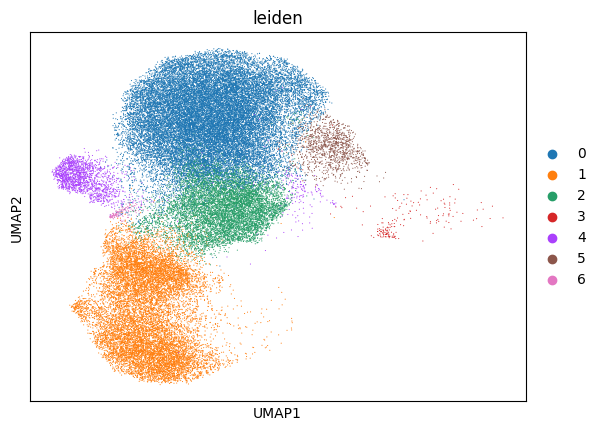

In [50]:
sc.pl.umap(mdata["gex"], color = "leiden")

In [51]:
sc.pp.log1p(mdata["gex"])
sc.pp.pca(mdata["gex"], svd_solver="arpack")
sc.pp.neighbors(mdata["gex"])
sc.tl.umap(mdata["gex"])

In [52]:
ir.pp.index_chains(mdata)
ir.tl.chain_qc(mdata)

In [53]:
# Define the conditions
colon_samples = ["10mix1", "10mix2", "11mix1", "11mix2", "GF1", "GF2"]

# Use np.where() to create the 'origin' column based on conditions
mdata["airr"].obs["origin"] = mdata["airr"].obs["sample_id"].apply(
    lambda x: "colon" if x in colon_samples else "til"
)

In [54]:
mdata["gex"].obs["sample_id"].value_counts()

sample_id
10mix_ICI2      8133
10mix_ICI1      7153
GF_ICI2_plus    6855
11mix_ICI2      6768
11mix_ICI1      6496
GF_ICI1_plus    4754
GF_ICI1         4743
GF_ICI2         4408
Name: count, dtype: int64

In [55]:
mdata["airr"].obs["sample_id"].value_counts()

sample_id
10mix-ICI2      8543
11mix-ICI2      7808
11mix-ICI1      7735
GF-ICI2-plus    7406
10mix-ICI1      7265
GF-ICI1-plus    6247
GF-ICI1         5840
GF-ICI2         5461
Name: count, dtype: int64

In [56]:
mdata

MuData object with n_obs × n_vars = 63776 × 11945
  2 modalities
    gex:	49310 x 11945
      obs:	'_scvi_batch', '_scvi_labels', 'batch', 'batch_id', 'cell_type', 'condition', 'is_doublet', 'is_outlier', 'is_outlier_counts', 'is_outlier_genes', 'is_outlier_mito', 'is_outlier_top_20', 'leiden', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'log1p_total_counts_mt', 'log1p_total_counts_ribo', 'n_counts', 'n_genes', 'n_genes_by_counts', 'origin', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'sample_id', 'total_counts', 'total_counts_mt', 'total_counts_ribo', 'value', 'outlier', 'mt_outlier', 'ribo_outlier', 'sample'
      var:	'ensembl_id', 'feature_types', 'gene_name', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'n_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
      uns:	'hvg', 'is_doublet_colors', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'neighbors_uncorrected', 'origin_colors', 'sample_id_colors', 'umap', 'pca'
      obsm:	'X_pca', 'X_scAR', 'X_scVI', 'X_umap', 'X_umap_uncorrected'
      varm:	'PCs'
      layers:	'counts', 'denoised', 'logcounts'
      obsp:	'connectivities', 'distances', 'neighbors_uncorrected_connectivities', 'neighbors_uncorrected_distances'
    airr:	56305 x 0
      obs:	'sample_id', 'group', 'condition', 'receptor_type', 'receptor_subtype', 'chain_pairing', 'origin'
      uns:	'chain_indices'
      obsm:	'airr', 'chain_indices'

In [57]:
mdata["gex"].obs

,_scvi_batch,_scvi_labels,batch,batch_id,cell_type,condition,is_doublet,is_outlier,is_outlier_counts,is_outlier_genes,...,pct_counts_ribo,sample_id,total_counts,total_counts_mt,total_counts_ribo,value,outlier,mt_outlier,ribo_outlier,sample
AAACCTGAGAGCCTAG_1_10mix_ICI1,0,0,0,ICI1,SLEC_Exhausted,10mix,singlet,False,False,False,...,7.306554,10mix_ICI1,8468.025391,0.000000,618.720886,0,False,False,False,10mix
AAACCTGAGGCTCTTA_1_10mix_ICI1,0,0,0,ICI1,MPEC_Naive,10mix,singlet,False,False,False,...,7.538410,10mix_ICI1,9098.912109,88.787018,685.913269,0,False,False,False,10mix
AAACCTGAGGGCTTGA_1_10mix_ICI1,0,0,0,ICI1,MPEC_Intermediate,10mix,singlet,False,False,False,...,9.105783,10mix_ICI1,7737.306152,76.176064,704.542297,0,False,False,False,10mix
AAACCTGAGGTTACCT_1_10mix_ICI1,0,0,0,ICI1,SLEC_Exhausted,10mix,singlet,False,False,False,...,3.969964,10mix_ICI1,16565.292969,78.500778,657.636169,0,False,False,False,10mix
AAACCTGCAACCGCCA_1_10mix_ICI1,0,0,0,ICI1,SLEC_Intermediate,10mix,singlet,False,False,False,...,8.942920,10mix_ICI1,6814.036621,0.000000,609.373840,0,False,False,False,10mix
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCCCTTGCA_1_GF_ICI2_plus,0,0,7,ICI2,SLEC_Intermediate,GF-plus,singlet,False,False,False,...,7.832887,GF_ICI2_plus,8411.129883,83.939003,658.834290,0,False,False,False,GF
TTTGTCATCGTTGCCT_1_GF_ICI2_plus,0,0,7,ICI2,SLEC_Exhausted,GF-plus,singlet,False,False,False,...,3.862386,GF_ICI2_plus,16598.160156,84.472771,641.084961,0,False,False,False,GF
TTTGTCATCTAACTGG_1_GF_ICI2_plus,0,0,7,ICI2,SLEC_Intermediate,GF-plus,singlet,False,False,False,...,6.085393,GF_ICI2_plus,6226.758789,35.431831,378.922791,0,False,False,False,GF
TTTGTCATCTCTGTCG_1_GF_ICI2_plus,0,0,7,ICI2,SLEC_Intermediate,GF-plus,singlet,False,False,False,...,13.810773,GF_ICI2_plus,4548.755371,44.855644,628.218262,0,False,False,False,GF


In [58]:
mdata["airr"].obs

,sample_id,group,condition,receptor_type,receptor_subtype,chain_pairing,origin
cell_id,,,,,,,
AAACCTGAGAGCCTAG_1_10mix_ICI1,10mix-ICI1,10mix,ICI,TCR,TRA+TRB,single pair,til
AAACCTGAGGCTCTTA_1_10mix_ICI1,10mix-ICI1,10mix,ICI,TCR,TRA+TRB,single pair,til
AAACCTGAGGGCACTA_1_10mix_ICI1,10mix-ICI1,10mix,ICI,TCR,TRA+TRB,single pair,til
AAACCTGAGGGCTTGA_1_10mix_ICI1,10mix-ICI1,10mix,ICI,TCR,TRA+TRB,single pair,til
AAACCTGAGGTTACCT_1_10mix_ICI1,10mix-ICI1,10mix,ICI,TCR,TRA+TRB,single pair,til
...,...,...,...,...,...,...,...
TTTGTCATCCAGAGGA_1_GF_ICI2_plus,GF-ICI2-plus,GF-plus,ICI,TCR,TRA+TRB,extra VJ,til
TTTGTCATCCCTTGCA_1_GF_ICI2_plus,GF-ICI2-plus,GF-plus,ICI,TCR,TRA+TRB,single pair,til
TTTGTCATCTAACTGG_1_GF_ICI2_plus,GF-ICI2-plus,GF-plus,ICI,TCR,TRA+TRB,extra VJ,til


In [59]:
mdata["gex"].obs["sample_id"].value_counts()

sample_id
10mix_ICI2      8133
10mix_ICI1      7153
GF_ICI2_plus    6855
11mix_ICI2      6768
11mix_ICI1      6496
GF_ICI1_plus    4754
GF_ICI1         4743
GF_ICI2         4408
Name: count, dtype: int64

In [60]:
mdata["airr"].obs["origin"].value_counts()

origin
til    56305
Name: count, dtype: int64

In [61]:
ir.get.airr(mdata, ["locus", "productive"])

,VJ_1_locus,VJ_1_productive,VDJ_1_locus,VDJ_1_productive,VJ_2_locus,VJ_2_productive,VDJ_2_locus,VDJ_2_productive
cell_id,,,,,,,,
AAACCTGAGAGCCTAG_1_10mix_ICI1,TRA,True,TRB,True,None,None,None,None
AAACCTGAGGCTCTTA_1_10mix_ICI1,TRA,True,TRB,True,None,None,None,None
AAACCTGAGGGCACTA_1_10mix_ICI1,TRA,True,TRB,True,None,None,None,None
AAACCTGAGGGCTTGA_1_10mix_ICI1,TRA,True,TRB,True,None,None,None,None
AAACCTGAGGTTACCT_1_10mix_ICI1,TRA,True,TRB,True,None,None,None,None
...,...,...,...,...,...,...,...,...
TTTGTCATCCAGAGGA_1_GF_ICI2_plus,TRA,True,TRB,True,TRA,True,None,None
TTTGTCATCCCTTGCA_1_GF_ICI2_plus,TRA,True,TRB,True,None,None,None,None
TTTGTCATCTAACTGG_1_GF_ICI2_plus,TRA,True,TRB,True,TRA,True,None,None


In [62]:
mdata["gex"].obs_names

Index(['AAACCTGAGAGCCTAG_1_10mix_ICI1', 'AAACCTGAGGCTCTTA_1_10mix_ICI1',
       'AAACCTGAGGGCTTGA_1_10mix_ICI1', 'AAACCTGAGGTTACCT_1_10mix_ICI1',
       'AAACCTGCAACCGCCA_1_10mix_ICI1', 'AAACCTGCAGTATGCT_1_10mix_ICI1',
       'AAACCTGCAGTCCTTC_1_10mix_ICI1', 'AAACCTGCAGTTCCCT_1_10mix_ICI1',
       'AAACCTGGTAGGCATG_1_10mix_ICI1', 'AAACCTGGTCTAGTCA_1_10mix_ICI1',
       ...
       'TTTGTCAGTTCGCTAA_1_GF_ICI2_plus', 'TTTGTCATCAATAAGG_1_GF_ICI2_plus',
       'TTTGTCATCACGCATA_1_GF_ICI2_plus', 'TTTGTCATCATGGTCA_1_GF_ICI2_plus',
       'TTTGTCATCCAGAGGA_1_GF_ICI2_plus', 'TTTGTCATCCCTTGCA_1_GF_ICI2_plus',
       'TTTGTCATCGTTGCCT_1_GF_ICI2_plus', 'TTTGTCATCTAACTGG_1_GF_ICI2_plus',
       'TTTGTCATCTCTGTCG_1_GF_ICI2_plus', 'TTTGTCATCTGTTGAG_1_GF_ICI2_plus'],
      dtype='object', length=49310)

In [63]:
mdata["airr"].obs_names

Index(['AAACCTGAGAGCCTAG_1_10mix_ICI1', 'AAACCTGAGGCTCTTA_1_10mix_ICI1',
       'AAACCTGAGGGCACTA_1_10mix_ICI1', 'AAACCTGAGGGCTTGA_1_10mix_ICI1',
       'AAACCTGAGGTTACCT_1_10mix_ICI1', 'AAACCTGCAACCGCCA_1_10mix_ICI1',
       'AAACCTGCACTTCTGC_1_10mix_ICI1', 'AAACCTGCAGGAACGT_1_10mix_ICI1',
       'AAACCTGCAGTCCTTC_1_10mix_ICI1', 'AAACCTGGTAGGCATG_1_10mix_ICI1',
       ...
       'TTTGTCAGTGCTTCTC_1_GF_ICI2_plus', 'TTTGTCAGTTCGCTAA_1_GF_ICI2_plus',
       'TTTGTCATCAATAAGG_1_GF_ICI2_plus', 'TTTGTCATCACGCATA_1_GF_ICI2_plus',
       'TTTGTCATCATGGTCA_1_GF_ICI2_plus', 'TTTGTCATCCAGAGGA_1_GF_ICI2_plus',
       'TTTGTCATCCCTTGCA_1_GF_ICI2_plus', 'TTTGTCATCTAACTGG_1_GF_ICI2_plus',
       'TTTGTCATCTCTGTCG_1_GF_ICI2_plus', 'TTTGTCATCTGTTGAG_1_GF_ICI2_plus'],
      dtype='object', name='cell_id', length=56305)

In [64]:
# Replace "-" with "_" in the 'obs_names' column
mdata["airr"].obs_names = mdata["airr"].obs_names.str.replace('-', '_')

In [65]:
# Replace "-" with "_" in the 'obs_names' column
mdata["gex"].obs_names = mdata["gex"].obs_names.str.replace('-', '_')

In [66]:
mdata.update()

In [67]:
len(set(mdata["gex"].obs_names) & set(mdata["airr"].obs_names))

41839

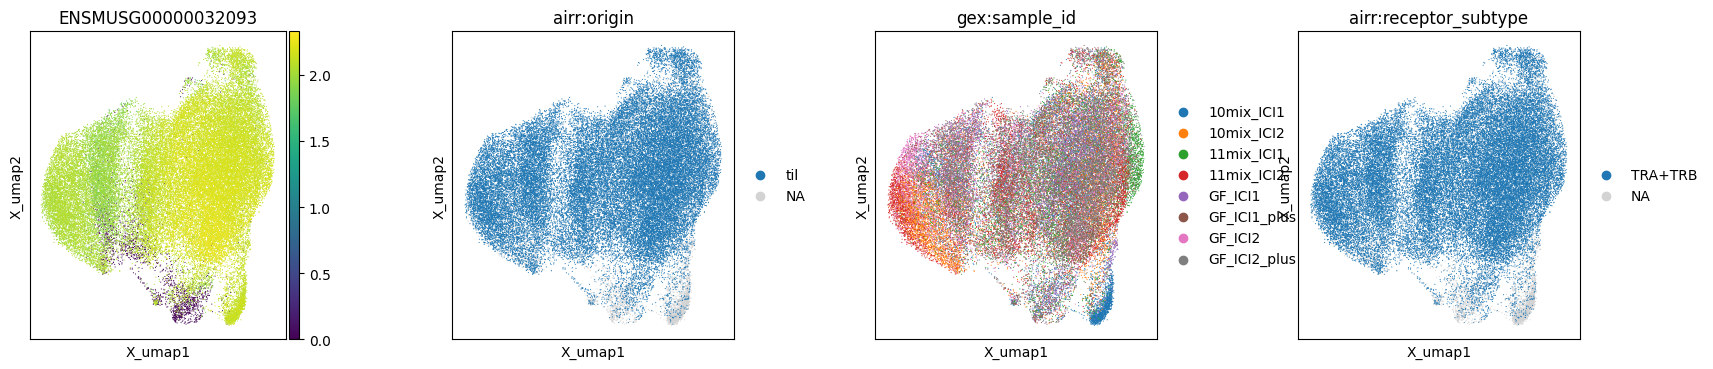

In [68]:
fig, (ax0, ax1,ax2,ax3) = plt.subplots(1, 4, figsize=(20, 4), gridspec_kw={"wspace": 0.5})
mu.pl.embedding(mdata, basis="gex:umap", color=["ENSMUSG00000032093"], ax=ax0, show=False)
mu.pl.embedding(mdata, basis="gex:umap", color=["airr:origin"], ax=ax1, show=False)
mu.pl.embedding(mdata, basis="gex:umap", color=["gex:sample_id"], ax=ax2, show=False)
mu.pl.embedding(mdata, basis="gex:umap", color=["airr:receptor_subtype"], ax=ax3)

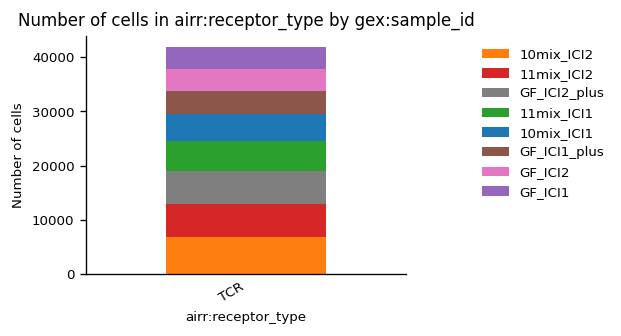

In [69]:
ir.tl.chain_qc(mdata)

_ = ir.pl.group_abundance(
   mdata, groupby="airr:receptor_type", target_col="gex:sample_id"
)


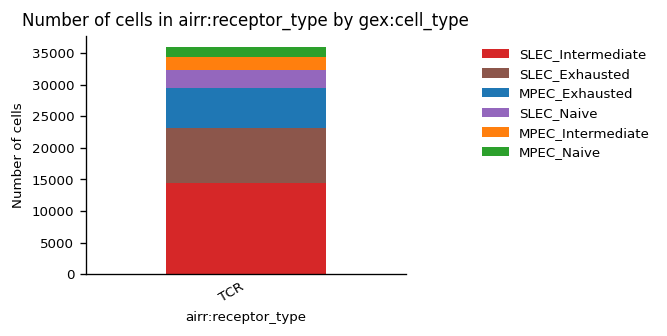

In [115]:
ir.tl.chain_qc(mdata)

_ = ir.pl.group_abundance(
   mdata, groupby="airr:receptor_type", target_col="gex:cell_type"
)


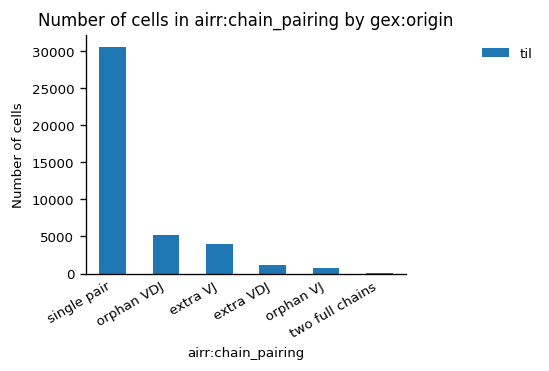

In [70]:
_ = ir.pl.group_abundance(mdata, groupby="airr:chain_pairing", target_col="gex:origin")

In [71]:
print(
    "Fraction of cells with more than one pair of TCRs: {:.2f}".format(
        np.sum(mdata.obs["airr:chain_pairing"].isin(["extra VJ", "extra VDJ", "two full chains", "multichain"]))
        / mdata["airr"].n_obs
    )
)

Fraction of cells with more than one pair of TCRs: 0.13


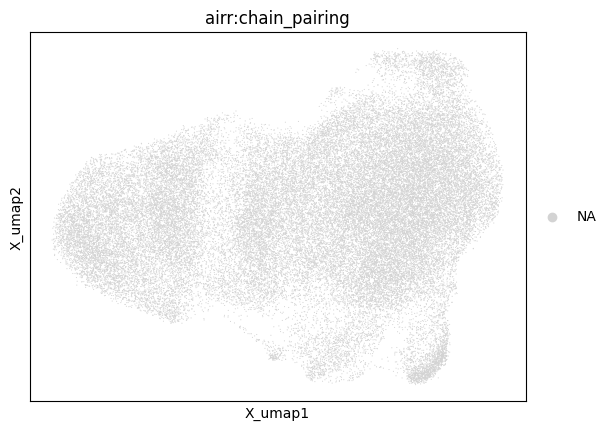

In [72]:
mu.pl.embedding(mdata, basis="gex:umap", color="airr:chain_pairing", groups="multichain")

In [73]:
mu.pp.filter_obs(mdata, "airr:chain_pairing", lambda x: x != "multichain")

In [74]:
mu.pp.filter_obs(mdata, "airr:chain_pairing", lambda x: ~np.isin(x, ["orphan VDJ", "orphan VJ"]))

In [75]:
mdata

MuData object with n_obs × n_vars = 55698 × 11945
  2 modalities
    gex:	43382 x 11945
      obs:	'_scvi_batch', '_scvi_labels', 'batch', 'batch_id', 'cell_type', 'condition', 'is_doublet', 'is_outlier', 'is_outlier_counts', 'is_outlier_genes', 'is_outlier_mito', 'is_outlier_top_20', 'leiden', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'log1p_total_counts_mt', 'log1p_total_counts_ribo', 'n_counts', 'n_genes', 'n_genes_by_counts', 'origin', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'sample_id', 'total_counts', 'total_counts_mt', 'total_counts_ribo', 'value', 'outlier', 'mt_outlier', 'ribo_outlier', 'sample'
      var:	'ensembl_id', 'feature_types', 'gene_name', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'n_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
      uns:	'hvg', 'is_doublet_colors', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'neighbors_uncorrected', 'origin_colors', 'sample_id_colors', 'umap', 'pca', 'airr:origin_colors', 'gex:sample_id_colors', 'airr:receptor_subtype_colors', 'airr:chain_pairing_colors'
      obsm:	'X_pca', 'X_scAR', 'X_scVI', 'X_umap', 'X_umap_uncorrected'
      varm:	'PCs'
      layers:	'counts', 'denoised', 'logcounts'
      obsp:	'connectivities', 'distances', 'neighbors_uncorrected_connectivities', 'neighbors_uncorrected_distances'
    airr:	48227 x 0
      obs:	'sample_id', 'group', 'condition', 'receptor_type', 'receptor_subtype', 'chain_pairing', 'origin'
      uns:	'chain_indices'
      obsm:	'airr', 'chain_indices'

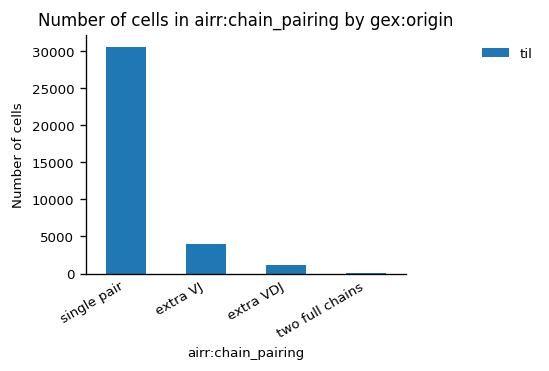

In [76]:
ax = ir.pl.group_abundance(mdata, groupby="airr:chain_pairing", target_col="gex:origin")

In [77]:
# using default parameters, `ir_dist` will compute nucleotide sequence identity
ir.pp.ir_dist(mdata)


In [78]:
mdata["airr"].obs["chain_pairing"]=mdata["airr"].obs["chain_pairing"].astype("string")

In [79]:
mdata["airr"].obs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48227 entries, AAACCTGAGAGCCTAG_1_10mix_ICI1 to TTTGTCATCTGTTGAG_1_GF_ICI2_plus
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   sample_id         48227 non-null  category
 1   group             48227 non-null  category
 2   condition         48227 non-null  category
 3   receptor_type     48227 non-null  category
 4   receptor_subtype  48227 non-null  category
 5   chain_pairing     48227 non-null  string  
 6   origin            48227 non-null  category
dtypes: category(6), string(1)
memory usage: 1.0+ MB


In [80]:
ir.tl.define_clonotypes(mdata, receptor_arms="all", dual_ir="primary_only")

In [81]:
ir.tl.clonotype_network(mdata, min_cells=2)


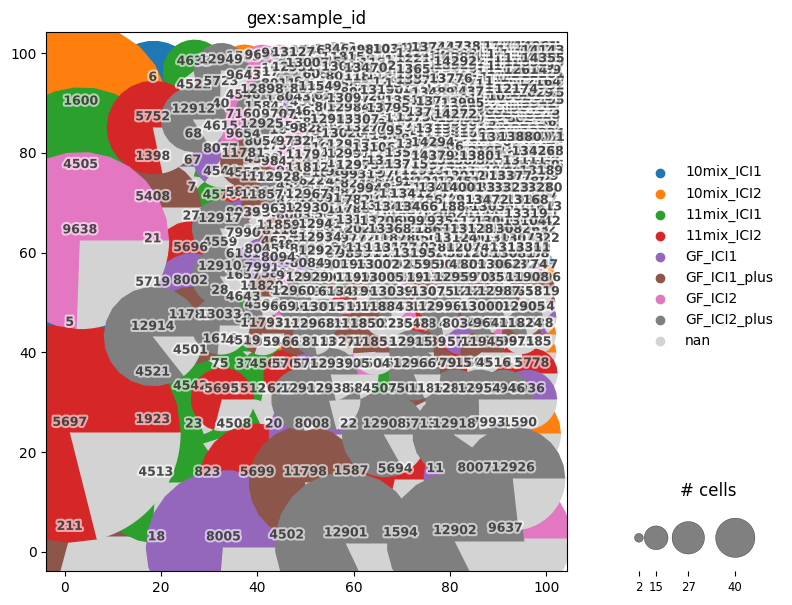

In [82]:
_ = ir.pl.clonotype_network(
mdata,
color="gex:sample_id",
base_size=20,
label_fontsize=9,
panel_size=(7, 7)
)

In [83]:
##3.5 Define clonotype clusters

In [84]:
ir.pp.ir_dist(mdata, metric="alignment", sequence="aa", cutoff=15)

100%|██████████| 528/528 [00:51<00:00, 10.16it/s]


In [85]:
ir.tl.define_clonotype_clusters(
mdata,
sequence="aa",
metric="alignment",
receptor_arms="all",
dual_ir="any"
)

In [86]:
ir.tl.clonotype_network(mdata, min_cells=2, sequence="aa", metric="alignment")

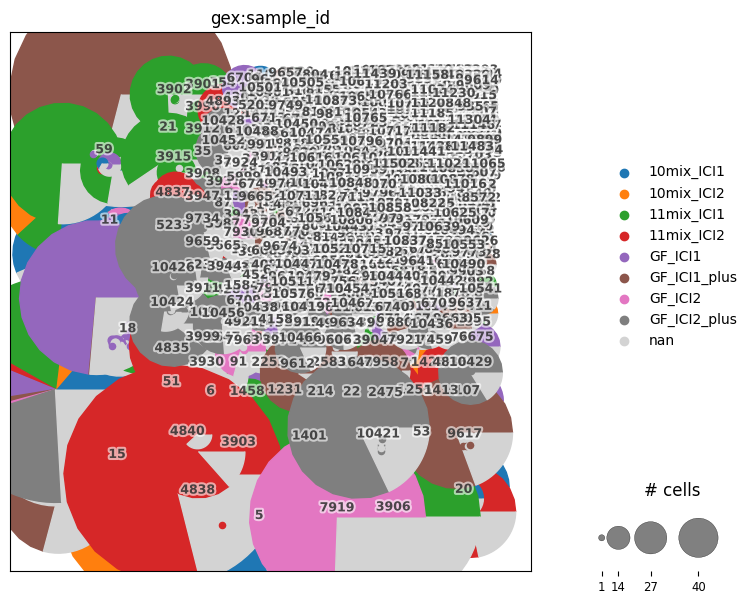

In [87]:
_ = ir.pl.clonotype_network(
mdata,
color="gex:sample_id",
label_fontsize=9,
panel_size=(7, 7),
base_size=20
)

In [89]:
mdata

MuData object with n_obs × n_vars = 55698 × 11945
  2 modalities
    gex:	43382 x 11945
      obs:	'_scvi_batch', '_scvi_labels', 'batch', 'batch_id', 'cell_type', 'condition', 'is_doublet', 'is_outlier', 'is_outlier_counts', 'is_outlier_genes', 'is_outlier_mito', 'is_outlier_top_20', 'leiden', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'log1p_total_counts_mt', 'log1p_total_counts_ribo', 'n_counts', 'n_genes', 'n_genes_by_counts', 'origin', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'sample_id', 'total_counts', 'total_counts_mt', 'total_counts_ribo', 'value', 'outlier', 'mt_outlier', 'ribo_outlier', 'sample'
      var:	'ensembl_id', 'feature_types', 'gene_name', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'n_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
      uns:	'hvg', 'is_doublet_colors', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'neighbors_uncorrected', 'origin_colors', 'sample_id_colors', 'umap', 'pca', 'airr:origin_colors', 'gex:sample_id_colors', 'airr:receptor_subtype_colors', 'airr:chain_pairing_colors'
      obsm:	'X_pca', 'X_scAR', 'X_scVI', 'X_umap', 'X_umap_uncorrected'
      varm:	'PCs'
      layers:	'counts', 'denoised', 'logcounts'
      obsp:	'connectivities', 'distances', 'neighbors_uncorrected_connectivities', 'neighbors_uncorrected_distances'
    airr:	48227 x 0
      obs:	'sample_id', 'group', 'condition', 'receptor_type', 'receptor_subtype', 'chain_pairing', 'origin', 'clone_id', 'clone_id_size', 'cc_aa_alignment', 'cc_aa_alignment_size'
      uns:	'chain_indices', 'ir_dist_nt_identity', 'clone_id', 'clonotype_network', 'ir_dist_aa_alignment', 'cc_aa_alignment'
      obsm:	'airr', 'chain_indices', 'X_clonotype_network'

/home/kvalem/.conda/envs/tcr_2024/lib/python3.12/site-packages/scirpy/util/__init__.py:457: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return 1 / cast(np.ndarray, obs.groupby(normalize_col)[normalize_col].transform("count").values)


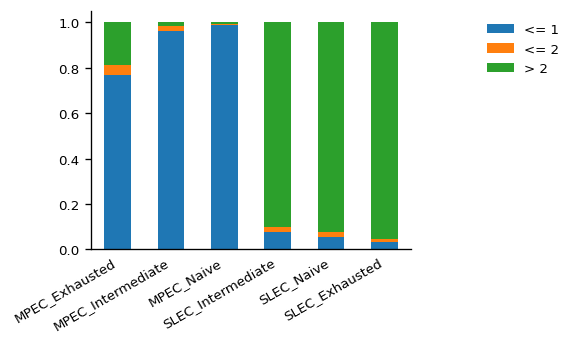

In [90]:
_ = ir.pl.clonal_expansion(
mdata,
target_col="clone_id",
groupby="gex:cell_type"
)

/home/kvalem/.conda/envs/tcr_2024/lib/python3.12/site-packages/scirpy/util/__init__.py:457: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return 1 / cast(np.ndarray, obs.groupby(normalize_col)[normalize_col].transform("count").values)


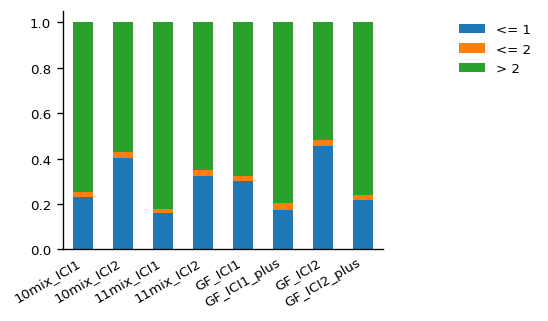

In [117]:
_ = ir.pl.clonal_expansion(
mdata,
target_col="clone_id",
groupby="gex:sample_id"
)

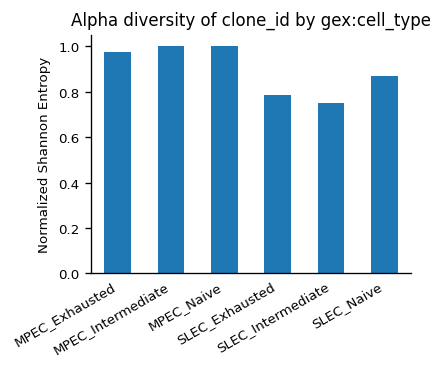

In [91]:
_ = ir.pl.alpha_diversity(
mdata,
metric="normalized_shannon_entropy",
groupby="gex:cell_type"
)

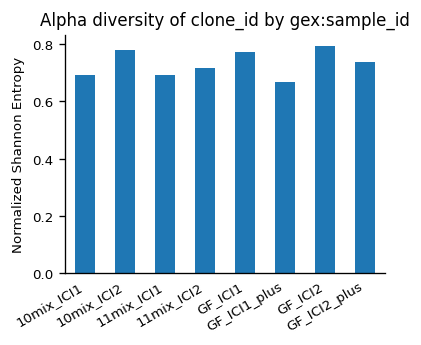

In [118]:
_ = ir.pl.alpha_diversity(
mdata,
metric="normalized_shannon_entropy",
groupby="gex:sample_id"
)

In [92]:
ir.tl.clonotype_modularity(mdata, target_col="airr:cc_aa_alignment")

100%|██████████| 1000/1000 [00:51<00:00, 19.44it/s]
/home/kvalem/.conda/envs/tcr_2024/lib/python3.12/site-packages/scipy/optimize/_numdiff.py:592: RuntimeWarning: invalid value encountered in subtract
  df = fun(x1) - f0


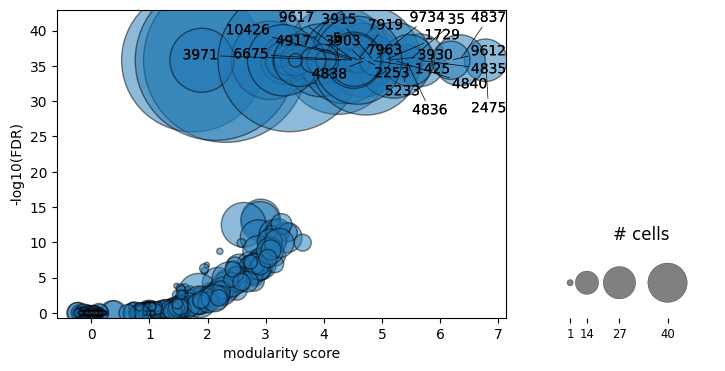

In [93]:
_ = ir.pl.clonotype_modularity(mdata, base_size=20)

In [94]:
clonotypes_top_modularity = list(
mdata.obs.set_index("airr:cc_aa_alignment")["airr:clonotype_modularity"]
.sort_values(ascending=False)
.index.unique()
.values[:1]
)

In [108]:
mdata.var

,gex:ensembl_id,gex:feature_types,gex:gene_name,gex:mt,gex:ribo,gex:n_cells_by_counts,gex:mean_counts,gex:log1p_mean_counts,gex:pct_dropout_by_counts,gex:total_counts,gex:log1p_total_counts,gex:n_cells,gex:n_counts,gex:highly_variable,gex:highly_variable_rank,gex:means,gex:variances,gex:variances_norm,gex:highly_variable_nbatches
ENSMUSG00000033845,ENSMUSG00000033845,Gene Expression,Mrpl15,False,False,15644.0,1.169332,0.774419,78.998805,87104.710938,11.374878,21484.0,24002.0,False,NaN,1.327405,5.528502,0.963611,0.0
ENSMUSG00000025903,ENSMUSG00000025903,Gene Expression,Lypla1,False,False,14215.0,1.073952,0.729456,80.917158,79999.789062,11.289792,19725.0,20230.0,False,NaN,1.222800,5.273152,0.967138,0.0
ENSMUSG00000033813,ENSMUSG00000033813,Gene Expression,Tcea1,False,False,30545.0,2.373390,1.215918,58.995046,176796.218750,12.082759,40436.0,45545.0,False,NaN,2.598504,8.122003,0.966765,0.0
ENSMUSG00000033793,ENSMUSG00000033793,Gene Expression,Atp6v1h,False,False,10560.0,0.817953,0.597711,85.823791,60930.109375,11.017499,14481.0,14530.0,False,3409.5,0.916394,4.352974,0.998627,2.0
ENSMUSG00000025907,ENSMUSG00000025907,Gene Expression,Rb1cc1,False,False,15940.0,1.282039,0.825069,78.601442,95500.367188,11.466896,21130.0,21450.0,False,2045.0,1.386223,6.238710,1.023630,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000063897,ENSMUSG00000063897,Gene Expression,CAAA01118383.1,False,False,7156.0,0.550870,0.438816,90.393470,41034.832031,10.622201,9764.0,9803.0,False,2894.0,0.614820,3.085952,0.994008,1.0
ENSMUSG00000051412,ENSMUSG00000051412,Gene Expression,Vamp7,False,False,4551.0,0.335245,0.289115,93.890537,24972.708984,10.125579,6640.0,6672.0,False,2992.0,0.401343,2.003972,0.963557,1.0
ENSMUSG00000079834,ENSMUSG00000079834,Gene Expression,Tmlhe,False,False,488.0,0.038844,0.038109,99.344887,2893.559814,7.970588,592.0,598.0,True,978.0,0.039054,0.227810,0.900718,9.0
ENSMUSG00000095742,ENSMUSG00000095742,Gene Expression,CAAA01147332.1,False,False,14892.0,1.133343,0.757690,80.008323,84423.882812,11.343617,20802.0,27325.0,False,2826.0,1.305978,5.596172,0.974313,1.0


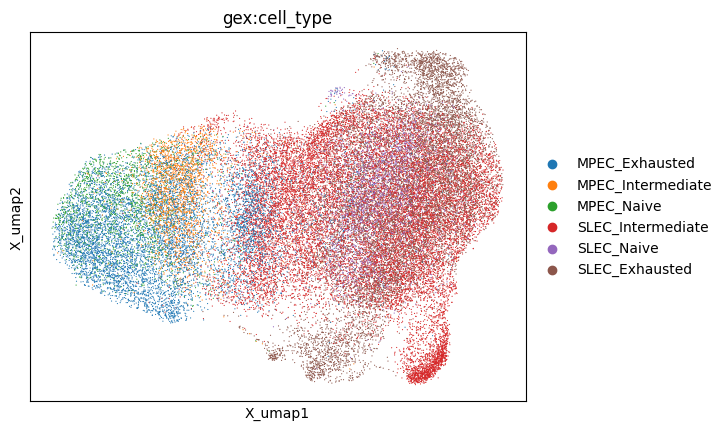

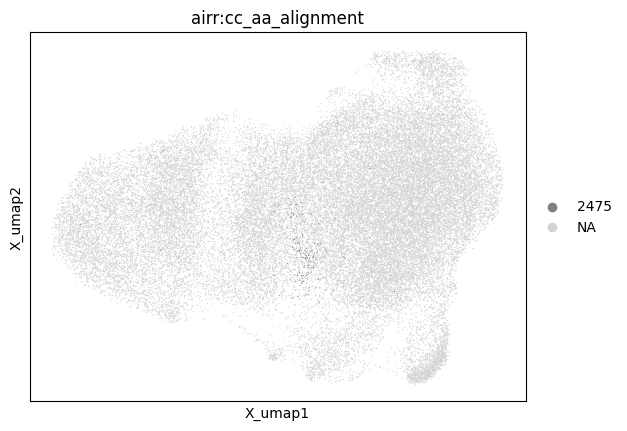

In [100]:
mu.pl.embedding(mdata,basis="gex:X_umap", color=["gex:cell_type"])
mu.pl.embedding(
mdata,
basis="gex:X_umap",
color="airr:cc_aa_alignment",
groups=clonotypes_top_modularity
)

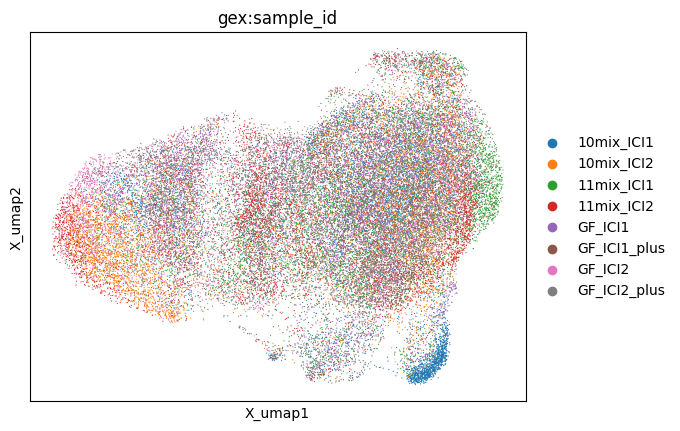

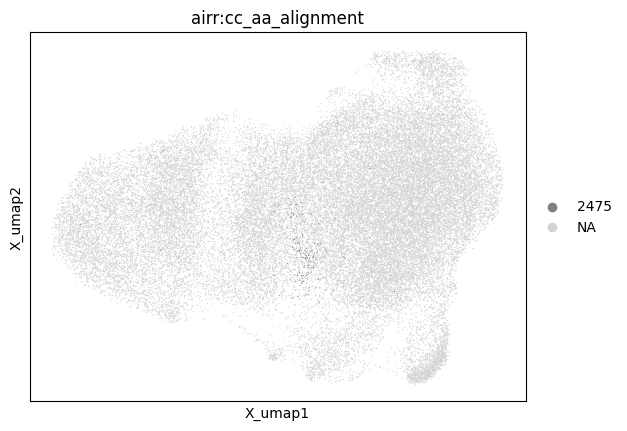

In [119]:
mu.pl.embedding(mdata,basis="gex:X_umap", color=["gex:sample_id"])
mu.pl.embedding(
mdata,
basis="gex:X_umap",
color="airr:cc_aa_alignment",
groups=clonotypes_top_modularity
)

/home/kvalem/.conda/envs/tcr_2024/lib/python3.12/site-packages/scanpy/plotting/_tools/__init__.py:1320: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


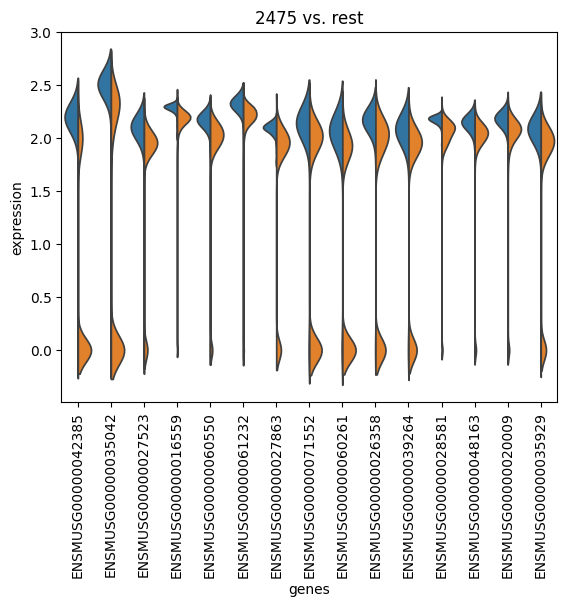

In [114]:
with ir.get.obs_context(
    mdata["gex"],
    {"cc_aa_alignment": mdata.obs["airr:cc_aa_alignment"]}) as tmp_ad:
    sc.tl.rank_genes_groups(
    tmp_ad,
    "cc_aa_alignment",
    groups=clonotypes_top_modularity,
    reference="rest",
    method="wilcoxon",
    )
    sc.pl.rank_genes_groups_violin(
    tmp_ad,
    groups=clonotypes_top_modularity,
    n_genes=15,
    show=False,
    strip=False
    )

/home/kvalem/.conda/envs/tcr_2024/lib/python3.12/site-packages/scanpy/plotting/_tools/__init__.py:1320: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


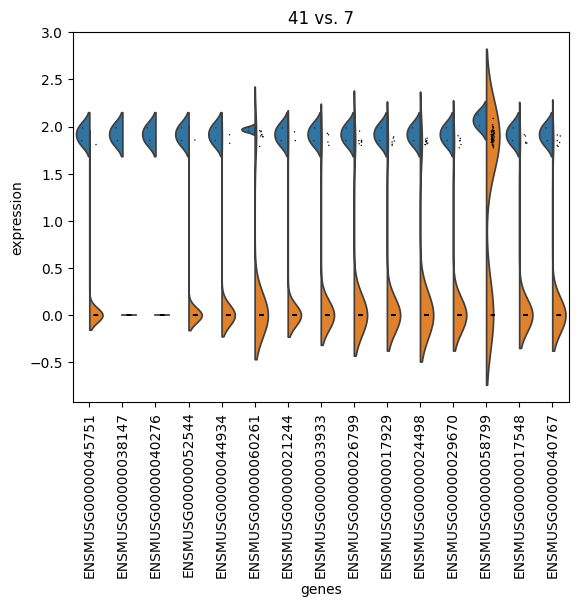

In [107]:
with ir.get.obs_context(
    mdata["gex"], {"clone_id": mdata.obs["airr:clone_id"]}
    ) as tmp_ad:
    sc.tl.rank_genes_groups(
    tmp_ad,
    
    "clone_id",
    groups=["41"],
    reference="7",
    method="wilcoxon"
    )
    sc.pl.rank_genes_groups_violin(tmp_ad, groups="41", n_genes=15)